In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
class SVM:

    def __init__(self, c=1):
        self.c = c
    
    def step_gradient(self, x, y, learning_rate, w, b):
        for i in range(len(x)):
            ti = y[i]*(np.dot(w, x[i])+b)
            for j in range(len(w)):
                if ti >= 1:
                    w[j] -= learning_rate*w[j]
                else:
                    w[j] += -learning_rate*w[j] + learning_rate*self.c*y[i]*x[i][j]
            if ti < 1:
                b += learning_rate*self.c*y[i]
        return w, b

    def cost(self, x, y, w, b):
        total_cost = 0.5*np.dot(w, w)
        for i in range(len(x)):
            total_cost += self.c*max(0, 1 - y[i]*(np.dot(w, x[i])+b))
        return total_cost

    def fit(self, x_train, y_train, learning_rate=0.1, maxItr=100):
        w = [0 for i in range(x_train.shape[1])]
        b = 0
        print('START: ', self.cost(x_train, y_train, w, b))
        for i in range(maxItr):
            w, b = self.step_gradient(x_train, y_train, learning_rate, w, b)
        print('FINAL: ', self.cost(x_train, y_train, w, b))
        return w, b

    def predict(self, X, w, b):
        predictions = []
        for x in X:
            if np.dot(w, x) + b > 0:
                predictions.append(1)
            else:
                predictions.append(-1)
        return np.array(predictions)
    
    def accuracy(self, x_test, y_test, w, b):
        y_pred = self.predict(x_test, w, b)
        count = (y_pred == y_test).sum()
        return count / len(y_test)

### Generating linearly separable data

In [10]:
separable = False
while not separable:
    samples = make_classification(n_samples=200, n_features=2, n_redundant=0)
    red = samples[0][samples[1] == 0]
    blue = samples[0][samples[1] == 1]
    separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
x = samples[0]
y = samples[1]
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1

### Training the classifier

In [11]:
clf = SVM()
w, b = clf.fit(x, y)

START:  200.0
FINAL:  88.2531425587


### Accuracy and decision boundary

Accuracy of the algorithm 0.98


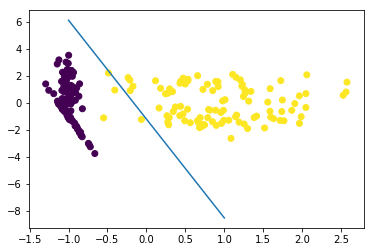

In [15]:
print("Accuracy of the algorithm", clf.accuracy(x, y, w, b))
x1 = np.linspace(-1, 1, 10)
x2 = [-(w[0]*x1[i] + b)/w[1] for i in range(10)]
plt.plot(x1, x2)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()